# How to open IPFS Files with Python?

This notebook provides a brief overview of how to open files hosted on the **I**nter**P**lanetary **F**ile **S**ystem (**IPFS**) using the core packages of the [Pangeo Community](https://pangeo.io/packages.html).

## Open IPFS Text File
First, let us open a simple `txt` file hosted on the IPFS.

To access an IPFS file in Python, you must first install `ipfsspec` beforehand:
```
pip install ipfsscpec
```
For more information, see: https://github.com/fsspec/ipfsspec/tree/main/ipfsspec

In [1]:
import fsspec

Now the file can be retrieved simply by its content identifier `CID`.

In [2]:
with fsspec.open("ipfs://QmSn69S3orFVpsRo7GCMKtS4wsBov5LESWVtRZ3wNeg9Lt", "r") as f:
    print(f.read())

IPFS is a distributed system for storing and accessing files, websites, applications, and data.



## Open IPFS Zarr File (500 MB)
In the next example, we access a ~300MB file hosted in `zarr` format on the IPFS.

In [3]:
import xarray as xr

Here, too, the file can simply be retrieved via its content identifier `CID`.

In [4]:
ds = xr.open_zarr("ipfs://QmfJ6uMHPbHdTs8VHUJT8nHv2WTLW6rmXHj14J9iJDZ8dn", consolidated=False)

In [5]:
ds

<xarray.Dataset>
Dimensions:    (lat: 192, bnds: 2, lon: 384, time: 1827)
Coordinates:
    height     float64 ...
  * lat        (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time       (time) datetime64[ns] 1960-01-01T12:00:00 ... 1964-12-31T12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(384, 2), meta=np.ndarray>
    tasmax     (time, lat, lon) float32 dask.array<chunksize=(229, 24, 96), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1827, 2), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  164358.0
    cmor_version:           3.5.0
    ...                     ...
    table_id:               day
    table_info:             Creation Date:(09 May 2019) MD5:e6ef8ececc8f33864...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    tracking_id:            hdl:21.14100/e12e71b1-6c54-424e-bb5b-3f9eab53ac75
    variable_id:            tasmax
    variant_label:          r10i1p1f1

In the above metadata we can see that the file contains the variable `tasmax`. Let us get more information about this variable:

In [6]:
ds.tasmax

<xarray.DataArray 'tasmax' (time: 1827, lat: 192, lon: 384)>
dask.array<open_dataset-e100adbd649900f43af0b54f8d1599c0tasmax, shape=(1827, 192, 384), dtype=float32, chunksize=(229, 24, 96), chunktype=numpy.ndarray>
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1960-01-01T12:00:00 ... 1964-12-31T12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: mean time: maximum
    comment:        maximum near-surface (usually, 2 meter) air temperature (...
    history:        2019-08-30T00:05:39Z altered by CMOR: Treated scalar dime...
    long_name:      Daily Maximum Near-Surface Air Temperature
    standard_name:  air_temperature
    units:          K

`tasmax` is the "maximum near-surface (usually, 2 meter) air temperature" and is available daily from January 1960 to December 1964.

Let us create an example plot of the first time step (01/01/1960).

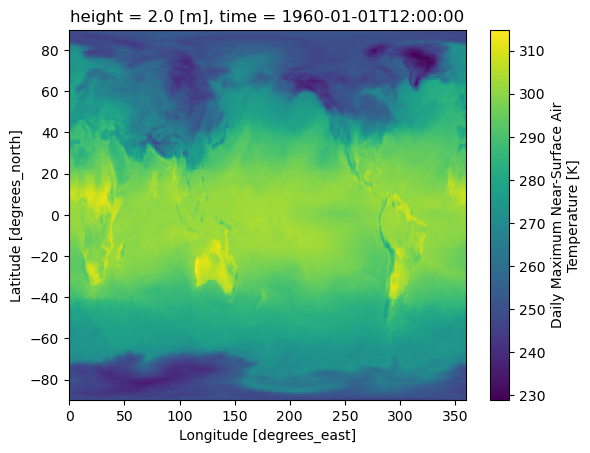

In [7]:
ds.tasmax[0,:,:].plot()

You may find that this step takes a few seconds while the data transfer takes place between your IPFS node and the IPFS node hosting the data. Fortunately, not all 300 MB of data is downloaded, only the data of the desired time step. This gives us the ability to work with large data files, larger than your computer's memory.

## Open large IPFS Zarr file (12 GiB)
In this example we are accessing a ~12GB file hosted in `zarr` format on the IPFS.. This file is larger than memory and can only be opened because it is broken into smaller parts (chunks) from which only the requested parts are downloaded. Here, too, the file can simply be retrieved via its content identifier `CID`.

In [8]:
ds_large = xr.open_zarr("ipfs://QmZSgx7CNvA6eN1VRMpGUdFo4eL2uzwreX9dnnW7sHnV7g")

In [9]:
ds_large

<xarray.Dataset>
Dimensions:    (lat: 192, bnds: 2, lon: 288, time: 60225)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(471, 192, 288), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(30113, 1), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    cmor_version:           3.5.0
    ...                     ...
    table_id:               day
    table_info:             Creation Date:(05 February 2020) MD5:6a248fd76c55...
    title:                  CMCC-CM2-HR4 output prepared for CMIP6
    tracking_id:            7af29565-027f-4d81-a74b-bee9a1235c0d
    variable_id:            pr
    variant_label:          r1i1p1f1

In the metadata we see that the file contains the variable `pr`. Let us get more information about this variable:

In [10]:
ds_large.pr

<xarray.DataArray 'pr' (time: 60225, lat: 192, lon: 288)>
dask.array<open_dataset-c1a133b38f4cb33af96222e1d4cc97f6pr, shape=(60225, 192, 288), dtype=float32, chunksize=(471, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        includes both liquid and solid phases
    long_name:      Precipitation
    original_name:  PRECT
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

`pr` is the "Precipitation" in "kg m-2 s-1", which "includes both liquid and solid phases" and is available daily from January 1850 to December 2014.

Let us create an example plot of the first time step (01/01/1850).

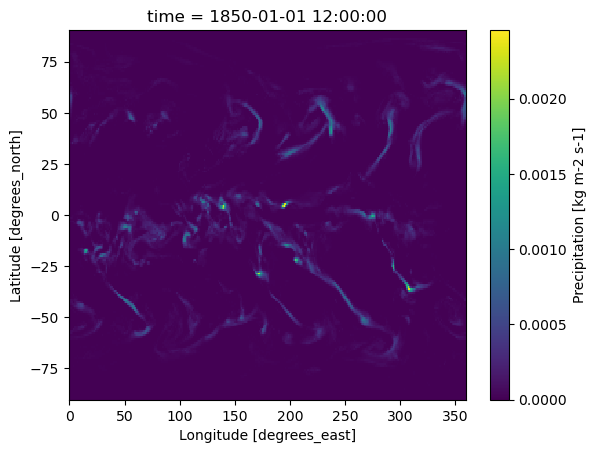

In [11]:
ds_large.pr[0,:,:].plot()

You may have noticed that the 12GB file did not take much longer to visualize than the 500MB file. This is because the file is chunked in IPFS and `xarray` in combination with `dask` only accesses the data chunk that contains the requested data.

Overall, setting up chunked data in IPFS combined with Python libraries like `zarr`, `xarray`, and `dask` strengthens **FAIR** data workflows by simplifying data **a**ccess.